In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista
import ufl
import time
from mpi4py import MPI
from petsc4py import PETSc
# import dolfinx
from dolfinx import fem, mesh, plot, nls, log, io
from dolfinx import cpp as _cpp
import meshio
import os
import seaborn as sns
import json
import sys

sys.path.append('../')
%load_ext autoreload
%autoreload 2

from src.utils import *
from src.model import *

vertex = [6,6,200]
num_nodes = [5,5,50]
domain = mesh.create_box(MPI.COMM_WORLD, [[0.0, 0.0, 0.0], vertex], 
                         num_nodes, mesh.CellType.tetrahedron) 

results_folder = r"../../results-data/"
exp_folder = "slab_test_infinite"

model = PerfusionGasExchangeModel(mesh_path=None,
                                  results_path=results_folder,
                                  exp_path=exp_folder,
                                  params=None)

model.Setup(domain)
model.parameter_setup()

max_dims = [  6.   6. 200.]
min_dims = [0. 0. 0.]


In [2]:
### Single loop test (works!)

model.p_params["uin"] = 800/3
p, u = model.Perfusion(domain, plot=False, save=True)

p_val = 0
guess = model.GasExchange(domain, guess=None, save=True, 
                          plot=False, p_val = p_val, 
                          postprocess=False, plot_lines=False)
N = 4
for i in range(N):
    p_val += 1/N
    if i != N-1:
        guess = model.GasExchange(domain, guess=guess, save=False, 
                                  plot=False, p_val = p_val, 
                                  postprocess=False, plot_lines=False)
    else:
        guess = model.GasExchange(domain, guess=guess, save=True, 
                                  plot=False, p_val = p_val, 
                                  postprocess=True, plot_lines=True)

Problem instanced.
Pressure field found.
Mesh path: ../../results-data/slab_test_infinite/p_new
Mesh path: ../../results-data/slab_test_infinite/u_new


2023-12-19 12:46:01.256 (  12.887s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:01.388 (  13.019s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:01.420 (  13.051s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.48971e-12 (tol = 1e-08) r (rel) = 5.43527e-16(tol = 1e-08)
2023-12-19 12:46:01.420 (  13.051s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Mesh path: ../../results-data/slab_test_infinite/gas_exchange/
Mesh path: ../../results-data/slab_test_infinite/gas_exchange/
Starting nonlinear problem with previous guess.
p_val = 0.25


2023-12-19 12:46:01.869 (  13.500s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:02.123 (  13.755s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:02.182 (  13.814s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 52.6868 (tol = 1e-08) r (rel) = 0.196286(tol = 1e-08)
2023-12-19 12:46:02.354 (  13.985s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:02.425 (  14.057s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 13.1261 (tol = 1e-08) r (rel) = 0.0489017(tol = 1e-08)
2023-12-19 12:46:02.587 (  14.218s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:02.654 (  14.285s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

Problem solved in 6 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-19 12:46:03.488 (  15.119s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:03.731 (  15.362s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:03.795 (  15.426s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 12.7514 (tol = 1e-08) r (rel) = 0.109175(tol = 1e-08)
2023-12-19 12:46:03.964 (  15.595s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:04.031 (  15.662s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.463763 (tol = 1e-08) r (rel) = 0.00397066(tol = 1e-08)
2023-12-19 12:46:04.209 (  15.840s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:04.273 (  15.904s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteratio

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-19 12:46:04.867 (  16.498s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:05.103 (  16.735s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:05.174 (  16.805s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 6.93253 (tol = 1e-08) r (rel) = 0.0777445(tol = 1e-08)
2023-12-19 12:46:05.344 (  16.975s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:05.407 (  17.038s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.103013 (tol = 1e-08) r (rel) = 0.00115524(tol = 1e-08)
2023-12-19 12:46:05.588 (  17.219s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:05.658 (  17.289s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-19 12:46:06.300 (  17.931s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:06.588 (  18.219s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:06.669 (  18.300s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.71597 (tol = 1e-08) r (rel) = 0.0619527(tol = 1e-08)
2023-12-19 12:46:06.855 (  18.486s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:06.932 (  18.563s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0328058 (tol = 1e-08) r (rel) = 0.000430962(tol = 1e-08)
2023-12-19 12:46:07.120 (  18.751s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-19 12:46:07.184 (  18.815s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Mesh path: ../../results-data/slab_test_infinite/gas_exchange/
Mesh path: ../../results-data/slab_test_infinite/gas_exchange/
Starting postprocessing.
Finished postprocessing at t = 16.815435886383057 s.
xs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 52), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 53), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 54), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), 

In [ ]:
# velocity tests

us = [80, 150, 250, 500, 1000]
results_us = {}

for u_in in us:

    model.p_params["uin"] = u_in
    p, u = model.Perfusion(domain, plot=False, save=True)

    p_val = 0
    guess = model.GasExchange(domain, guess=None, save=False, 
                              plot=False, p_val = p_val, 
                              postprocess=False, plot_lines=False)
    N = 10
    for i in range(N):
        p_val += 1/N
        if i != N-1:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=False, plot_lines=False)
        else:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=True, plot_lines=True)
            
    results_us[f"{u_in}"] = model.results_dict

In [ ]:
# pH tests

u_in = 80
pHs_rbc = [7.0, 7.2, 7.4, 7.6, 7.8] 
pHs_pla = [(pH_rbc - 1.357)/0.795 for pH_rbc in pHs_rbc]
################ Esto cambia RBC pero no pla, y falta incorporar p_H_pla en el modelo!
results_pHs = {}

for pH_rbc, pH_pla in zip(pHs_rbc, pHs_pla):
    model.p_params["uin"] = u_in
    model.dash_params["pH_rbc"] = pH_rbc
    model.dash_params["pH_pla"] = pH_pla
    print(f"pH_rbc = {pH_rbc}, pH_pla = {pH_pla}")
    p, u = model.Perfusion(domain, plot=False, save=True)

    p_val = 0
    guess = model.GasExchange(domain, guess=None, save=False, 
                              plot=False, p_val = p_val, 
                              postprocess=False, plot_lines=False)
    N = 4
    for i in range(N):
        p_val += 1/N
        if i != N-1:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=False, plot_lines=False)
        else:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=True, plot_lines=True)
            
    results_pHs[f"{pH_rbc}"] = model.results_dict

In [97]:
# diffusivity tests

u_in = 80
difs_O2 = model.t_params["d_ba_O2"]*np.linspace(0.5, 2.0, 4)
print(difs_O2)
################ Esto cambia RBC pero no pla, y falta incorporar p_H_pla en el modelo!
results_dif_O2 = {}

for d_O2 in difs_O2:
    model.p_params["uin"] = u_in
    model.t_params["d_ba_O2"] = d_O2
    p, u = model.Perfusion(domain, plot=False, save=True)

    p_val = 0
    guess = model.GasExchange(domain, guess=None, save=False, 
                              plot=False, p_val = p_val, 
                              postprocess=False, plot_lines=False)
    N = 4
    for i in range(N):
        p_val += 1/N
        if i != N-1:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=False, plot_lines=False)
        else:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=True, plot_lines=True)
            
    results_dif_O2[f"{d_O2}"] = model.results_dict

[ 457.  914. 1371. 1828.]
Problem instanced.
Pressure field found.
Mesh path: ../../results-data/slab_test_zurita/p_new
Mesh path: ../../results-data/slab_test_zurita/u_new


2023-12-18 01:43:35.637 (9452.858s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:35.690 (9452.912s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:35.700 (9452.922s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.55709e-12 (tol = 1e-08) r (rel) = 1.09892e-15(tol = 1e-08)
2023-12-18 01:43:35.700 (9452.922s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.25


2023-12-18 01:43:35.945 (9453.167s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:36.124 (9453.345s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:36.180 (9453.402s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 123.679 (tol = 1e-08) r (rel) = 0.250559(tol = 1e-08)
2023-12-18 01:43:36.335 (9453.556s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:36.378 (9453.599s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 44.1521 (tol = 1e-08) r (rel) = 0.0894469(tol = 1e-08)
2023-12-18 01:43:36.497 (9453.719s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:36.540 (9453.761s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:43:37.258 (9454.479s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:37.414 (9454.636s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:37.453 (9454.675s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 18.3276 (tol = 1e-08) r (rel) = 0.104297(tol = 1e-08)
2023-12-18 01:43:37.578 (9454.799s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:37.614 (9454.835s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.659459 (tol = 1e-08) r (rel) = 0.00375278(tol = 1e-08)
2023-12-18 01:43:37.725 (9454.947s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:37.760 (9454.982s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteratio

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:43:38.172 (9455.393s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:38.354 (9455.575s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:38.390 (9455.611s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 8.43611 (tol = 1e-08) r (rel) = 0.0675927(tol = 1e-08)
2023-12-18 01:43:38.505 (9455.726s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:38.539 (9455.760s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.101453 (tol = 1e-08) r (rel) = 0.000812872(tol = 1e-08)
2023-12-18 01:43:38.648 (9455.869s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:38.682 (9455.904s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:43:39.081 (9456.303s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:39.253 (9456.474s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:39.297 (9456.518s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 5.11884 (tol = 1e-08) r (rel) = 0.0508396(tol = 1e-08)
2023-12-18 01:43:39.416 (9456.638s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:39.453 (9456.674s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0308749 (tol = 1e-08) r (rel) = 0.000306646(tol = 1e-08)
2023-12-18 01:43:39.568 (9456.789s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:39.605 (9456.826s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 11.872278928756714 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 885), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 886), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 887), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 888), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (Bas

2023-12-18 01:43:51.983 (9469.205s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:52.008 (9469.230s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:52.017 (9469.238s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.38577e-12 (tol = 1e-08) r (rel) = 1.05487e-15(tol = 1e-08)
2023-12-18 01:43:52.017 (9469.238s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.
2023-12-18 01:43:52.258 (9469.480s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:52.411 (9469.632s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:52.448 (9469.669s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (a

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:43:53.496 (9470.718s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:53.704 (9470.925s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:53.743 (9470.965s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 13.5128 (tol = 1e-08) r (rel) = 0.0982888(tol = 1e-08)
2023-12-18 01:43:53.867 (9471.089s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:53.912 (9471.133s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.450028 (tol = 1e-08) r (rel) = 0.00327338(tol = 1e-08)
2023-12-18 01:43:54.043 (9471.265s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:54.080 (9471.301s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:43:54.243 (9471.465s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 5: r (abs) = 3.36399e-09 (tol = 1e-08) r (rel) = 2.44688e-11(tol = 1e-08)
2023-12-18 01:43:54.243 (9471.465s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 5 iterations and 5 linear solver iterations.
2023-12-18 01:43:54.495 (9471.716s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:54.643 (9471.864s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:54.678 (9471.899s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 6.09275 (tol = 1e-08) r (rel) = 0.0629418(tol = 1e-08)
2023-12-18 01:43:54.802 (9472.023s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:54.845 (9472.067s) [main            ]       NewtonSolver.c

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:43:55.411 (9472.632s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:55.571 (9472.792s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:55.610 (9472.831s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.63418 (tol = 1e-08) r (rel) = 0.0467918(tol = 1e-08)
2023-12-18 01:43:55.721 (9472.942s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:55.756 (9472.977s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0213574 (tol = 1e-08) r (rel) = 0.000274987(tol = 1e-08)
2023-12-18 01:43:55.868 (9473.089s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:43:55.906 (9473.128s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 11.868462085723877 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 942), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 943), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 944), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 945), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (Bas

2023-12-18 01:44:08.279 (9485.501s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:08.315 (9485.536s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:08.328 (9485.549s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.38489e-12 (tol = 1e-08) r (rel) = 1.05354e-15(tol = 1e-08)
2023-12-18 01:44:08.328 (9485.549s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.
2023-12-18 01:44:08.555 (9485.776s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:08.716 (9485.937s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:08.752 (9485.973s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (a

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:44:09.948 (9487.170s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:10.131 (9487.352s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:10.168 (9487.390s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 11.4093 (tol = 1e-08) r (rel) = 0.0955342(tol = 1e-08)
2023-12-18 01:44:10.294 (9487.515s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:10.334 (9487.555s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.361826 (tol = 1e-08) r (rel) = 0.00302969(tol = 1e-08)
2023-12-18 01:44:10.464 (9487.685s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:10.507 (9487.729s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:44:10.636 (9487.857s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:10.679 (9487.900s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 5: r (abs) = 2.89564e-09 (tol = 1e-08) r (rel) = 2.42461e-11(tol = 1e-08)
2023-12-18 01:44:10.679 (9487.900s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 5 iterations and 5 linear solver iterations.
2023-12-18 01:44:10.915 (9488.136s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:11.095 (9488.317s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:11.135 (9488.357s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 5.0903 (tol = 1e-08) r (rel) = 0.0608138(tol = 1e-08)
2023-12-18 01:44:11.265 (9488.487s) [main            ]              petsc.cp

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:44:11.866 (9489.088s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:12.036 (9489.257s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:12.074 (9489.295s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.01611 (tol = 1e-08) r (rel) = 0.0450369(tol = 1e-08)
2023-12-18 01:44:12.188 (9489.409s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:12.227 (9489.448s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0174531 (tol = 1e-08) r (rel) = 0.000260612(tol = 1e-08)
2023-12-18 01:44:12.347 (9489.569s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:12.394 (9489.616s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 11.677314043045044 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 999), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1000), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1001), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1002), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (

2023-12-18 01:44:24.554 (9501.775s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:24.578 (9501.799s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:24.586 (9501.808s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.33855e-12 (tol = 1e-08) r (rel) = 1.04177e-15(tol = 1e-08)
2023-12-18 01:44:24.586 (9501.808s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.
2023-12-18 01:44:24.811 (9502.033s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:24.959 (9502.180s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:24.998 (9502.220s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (a

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:44:25.992 (9503.213s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:26.154 (9503.376s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:26.194 (9503.416s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 10.1741 (tol = 1e-08) r (rel) = 0.0939776(tol = 1e-08)
2023-12-18 01:44:26.309 (9503.530s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:26.367 (9503.589s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.283362 (tol = 1e-08) r (rel) = 0.00261739(tol = 1e-08)
2023-12-18 01:44:26.506 (9503.727s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:26.542 (9503.764s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:44:26.910 (9504.132s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:27.091 (9504.313s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:27.127 (9504.348s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.49835 (tol = 1e-08) r (rel) = 0.0595066(tol = 1e-08)
2023-12-18 01:44:27.241 (9504.462s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:27.280 (9504.501s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0474591 (tol = 1e-08) r (rel) = 0.000627816(tol = 1e-08)
2023-12-18 01:44:27.391 (9504.612s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:27.431 (9504.652s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:44:27.597 (9504.819s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 5: r (abs) = 5.20224e-13 (tol = 1e-08) r (rel) = 6.88181e-15(tol = 1e-08)
2023-12-18 01:44:27.597 (9504.819s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 5 iterations and 5 linear solver iterations.
2023-12-18 01:44:27.817 (9505.038s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:27.964 (9505.186s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:28.003 (9505.224s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.65535 (tol = 1e-08) r (rel) = 0.043984(tol = 1e-08)
2023-12-18 01:44:28.123 (9505.345s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:28.159 (9505.381s) [main            ]       NewtonSolver.cp

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 13.480838537216187 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1056), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1057), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1058), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1059), 'bic': Coefficient(FunctionSpace(Mesh(blocked element 

In [98]:
# diffusivity tests

u_in = 80
difs_CO2 = model.t_params["d_ba_CO2"]*np.linspace(0.5, 2.0, 4)
print(difs_CO2)
################ Esto cambia RBC pero no pla, y falta incorporar p_H_pla en el modelo!
results_dif_CO2 = {}

for d_CO2 in difs_CO2:
    model.p_params["uin"] = u_in
    model.t_params["d_ba_CO2"] = d_CO2
    p, u = model.Perfusion(domain, plot=False, save=True)

    p_val = 0
    guess = model.GasExchange(domain, guess=None, save=False, 
                              plot=False, p_val = p_val, 
                              postprocess=False, plot_lines=False)
    N = 4
    for i in range(N):
        p_val += 1/N
        if i != N-1:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=False, plot_lines=False)
        else:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=True, plot_lines=True)
            
    results_dif_CO2[f"{d_CO2}"] = model.results_dict

[ 500. 1000. 1500. 2000.]
Problem instanced.
Pressure field found.
Mesh path: ../../results-data/slab_test_zurita/p_new
Mesh path: ../../results-data/slab_test_zurita/u_new


2023-12-18 01:44:45.968 (9523.190s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:46.016 (9523.238s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:46.029 (9523.251s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.57416e-12 (tol = 1e-08) r (rel) = 1.09793e-15(tol = 1e-08)
2023-12-18 01:44:46.029 (9523.251s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.25


2023-12-18 01:44:50.902 (9528.124s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:51.075 (9528.297s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:51.115 (9528.337s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 72.8914 (tol = 1e-08) r (rel) = 0.219915(tol = 1e-08)
2023-12-18 01:44:51.244 (9528.465s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:51.290 (9528.511s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 33.9981 (tol = 1e-08) r (rel) = 0.102573(tol = 1e-08)
2023-12-18 01:44:51.421 (9528.642s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:51.464 (9528.685s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:44:54.929 (9532.150s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:55.145 (9532.366s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:55.200 (9532.421s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 10.0944 (tol = 1e-08) r (rel) = 0.0935498(tol = 1e-08)
2023-12-18 01:44:55.353 (9532.574s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:55.398 (9532.620s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.277926 (tol = 1e-08) r (rel) = 0.00257568(tol = 1e-08)
2023-12-18 01:44:55.531 (9532.752s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:55.585 (9532.807s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:44:59.092 (9536.313s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:59.291 (9536.512s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:59.335 (9536.557s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.45954 (tol = 1e-08) r (rel) = 0.059181(tol = 1e-08)
2023-12-18 01:44:59.482 (9536.704s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:59.543 (9536.764s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0464482 (tol = 1e-08) r (rel) = 0.000616398(tol = 1e-08)
2023-12-18 01:44:59.699 (9536.920s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:44:59.749 (9536.970s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:45:02.581 (9539.803s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:02.745 (9539.967s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:02.783 (9540.004s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.63221 (tol = 1e-08) r (rel) = 0.043733(tol = 1e-08)
2023-12-18 01:45:02.901 (9540.123s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:02.945 (9540.167s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0145273 (tol = 1e-08) r (rel) = 0.000241364(tol = 1e-08)
2023-12-18 01:45:03.074 (9540.295s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:03.123 (9540.345s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 12.076878547668457 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1113), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1114), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1115), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1116), 'bic': Coefficient(FunctionSpace(Mesh(blocked element 

2023-12-18 01:45:15.842 (9553.064s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:15.868 (9553.089s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:15.880 (9553.101s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.33855e-12 (tol = 1e-08) r (rel) = 1.04177e-15(tol = 1e-08)
2023-12-18 01:45:15.880 (9553.101s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.
2023-12-18 01:45:16.140 (9553.361s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:16.295 (9553.516s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:16.333 (9553.554s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (a

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:45:17.478 (9554.700s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:17.671 (9554.892s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:17.712 (9554.934s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 10.1741 (tol = 1e-08) r (rel) = 0.0939776(tol = 1e-08)
2023-12-18 01:45:17.846 (9555.067s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:17.883 (9555.105s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.283362 (tol = 1e-08) r (rel) = 0.00261739(tol = 1e-08)
2023-12-18 01:45:18.008 (9555.229s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:18.049 (9555.271s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:45:18.493 (9555.714s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:18.663 (9555.885s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:18.701 (9555.922s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.49835 (tol = 1e-08) r (rel) = 0.0595066(tol = 1e-08)
2023-12-18 01:45:18.832 (9556.053s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:18.870 (9556.092s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0474591 (tol = 1e-08) r (rel) = 0.000627816(tol = 1e-08)
2023-12-18 01:45:18.995 (9556.217s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:19.033 (9556.254s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:45:19.221 (9556.442s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 5: r (abs) = 5.20224e-13 (tol = 1e-08) r (rel) = 6.88181e-15(tol = 1e-08)
2023-12-18 01:45:19.221 (9556.442s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 5 iterations and 5 linear solver iterations.
2023-12-18 01:45:19.450 (9556.672s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:19.598 (9556.820s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:19.642 (9556.863s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.65535 (tol = 1e-08) r (rel) = 0.043984(tol = 1e-08)
2023-12-18 01:45:19.764 (9556.985s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:19.802 (9557.023s) [main            ]       NewtonSolver.cp

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 12.238728046417236 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1170), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1171), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1172), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1173), 'bic': Coefficient(FunctionSpace(Mesh(blocked element 

2023-12-18 01:45:34.946 (9572.167s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:34.975 (9572.196s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:34.984 (9572.205s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.84284e-12 (tol = 1e-08) r (rel) = 6.82731e-16(tol = 1e-08)
2023-12-18 01:45:34.984 (9572.205s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.25


2023-12-18 01:45:38.544 (9575.765s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:38.716 (9575.938s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:38.763 (9575.984s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 73.2486 (tol = 1e-08) r (rel) = 0.219858(tol = 1e-08)
2023-12-18 01:45:38.887 (9576.108s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:38.924 (9576.146s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 34.3935 (tol = 1e-08) r (rel) = 0.103233(tol = 1e-08)
2023-12-18 01:45:39.058 (9576.279s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:39.111 (9576.333s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:45:39.662 (9576.884s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 7: r (abs) = 1.62745e-09 (tol = 1e-08) r (rel) = 4.88484e-12(tol = 1e-08)
2023-12-18 01:45:39.662 (9576.884s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 7 iterations and 7 linear solver iterations.
2023-12-18 01:45:42.622 (9579.844s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:42.776 (9579.998s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:42.812 (9580.033s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 10.2227 (tol = 1e-08) r (rel) = 0.0942535(tol = 1e-08)
2023-12-18 01:45:42.947 (9580.168s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:42.990 (9580.212s) [main            ]       NewtonSolver.c

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:45:46.452 (9583.673s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:46.638 (9583.859s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:46.679 (9583.900s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.52003 (tol = 1e-08) r (rel) = 0.059697(tol = 1e-08)
2023-12-18 01:45:46.817 (9584.039s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:46.864 (9584.085s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0480479 (tol = 1e-08) r (rel) = 0.00063458(tol = 1e-08)
2023-12-18 01:45:47.012 (9584.234s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:47.058 (9584.279s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:45:49.756 (9586.978s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:49.909 (9587.131s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:49.945 (9587.167s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.66743 (tol = 1e-08) r (rel) = 0.0441201(tol = 1e-08)
2023-12-18 01:45:50.066 (9587.287s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:50.110 (9587.332s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0150316 (tol = 1e-08) r (rel) = 0.000248627(tol = 1e-08)
2023-12-18 01:45:50.259 (9587.480s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:45:50.301 (9587.522s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.


2023-12-18 01:45:50.483 (9587.705s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 5: r (abs) = 3.54704e-13 (tol = 1e-08) r (rel) = 5.86692e-15(tol = 1e-08)
2023-12-18 01:45:50.483 (9587.705s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 5 iterations and 5 linear solver iterations.


Finished postprocessing at t = 12.761383295059204 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1227), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1228), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1229), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1230), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, Fal

2023-12-18 01:46:05.874 (9603.095s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:05.931 (9603.152s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:05.945 (9603.167s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 1.59844e-12 (tol = 1e-08) r (rel) = 3.8391e-16(tol = 1e-08)
2023-12-18 01:46:05.945 (9603.167s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.25


2023-12-18 01:46:09.927 (9607.148s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:10.082 (9607.303s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:10.120 (9607.342s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 73.3538 (tol = 1e-08) r (rel) = 0.219851(tol = 1e-08)
2023-12-18 01:46:10.246 (9607.467s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:10.288 (9607.510s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 34.5146 (tol = 1e-08) r (rel) = 0.103445(tol = 1e-08)
2023-12-18 01:46:10.407 (9607.629s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:10.444 (9607.665s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 7 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2023-12-18 01:46:13.220 (9610.441s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:13.369 (9610.591s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:13.406 (9610.627s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 10.2565 (tol = 1e-08) r (rel) = 0.0944512(tol = 1e-08)
2023-12-18 01:46:13.515 (9610.737s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:13.559 (9610.780s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.289151 (tol = 1e-08) r (rel) = 0.00266277(tol = 1e-08)
2023-12-18 01:46:13.672 (9610.893s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:13.708 (9610.930s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.75


2023-12-18 01:46:16.290 (9613.511s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:16.472 (9613.694s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:16.514 (9613.736s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.53411 (tol = 1e-08) r (rel) = 0.0598236(tol = 1e-08)
2023-12-18 01:46:16.638 (9613.859s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:16.678 (9613.900s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0484388 (tol = 1e-08) r (rel) = 0.000639107(tol = 1e-08)
2023-12-18 01:46:16.797 (9614.019s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:16.844 (9614.066s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 1.0


2023-12-18 01:46:19.558 (9616.779s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:19.784 (9617.005s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:19.836 (9617.057s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.67489 (tol = 1e-08) r (rel) = 0.0442058(tol = 1e-08)
2023-12-18 01:46:19.960 (9617.182s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:20.007 (9617.228s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0151431 (tol = 1e-08) r (rel) = 0.000250257(tol = 1e-08)
2023-12-18 01:46:20.149 (9617.371s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2023-12-18 01:46:20.197 (9617.418s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 14.643800258636475 s.
xs = [4. 6. 8.]
y_fixed = 4.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1284), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1285), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1286), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 5), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 1287), 'bic': Coefficient(FunctionSpace(Mesh(blocked element 

In [99]:
func_units = ["", "", "[mM]", "[mM]", "[mM]", "[mmHg]", "[mmHg]"]
func_factor = [1, 1, 1E15, 1E15, 1E15, 1, 1]
func_names = [r"S$_{HbO_2}$", r"S$_{HbCO_2}$", r"c$_{O_2}$", r"c$_{CO_2}$", r"[HCO$_3^-$]", r"p$_{O_2}$", r"p$_{CO_2}$"]

In [ ]:
# plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
# plt.rcParams['axes.xmargin'] = 0
# plt.rcParams['axes.ymargin'] = 0

In [ ]:
# Velocity-dependent fields

colors = sns.color_palette("Reds", len(us))

j = 0
for func_name in model.func_dict.keys():
    fig, ax = plt.subplots(figsize=(5,3.5), dpi=125)
    i = 0
    for u_curr in results_us.keys():
        ax.plot(model.z, func_factor[j]*results_us[u_curr][func_name]['4.0'], color=colors[i], label=r"$u_{in}$ = " + f'{u_curr}')
        i += 1
    ax.set_ylabel(func_names[j] + func_units[j], size=13)
    ax.set_xlabel(r"x [$\mu$m]", size=13)
    ax.tick_params(axis='both', labelsize=13)
    # ax.set_ylim(min(results_us[u_curr][func_name]['4.0']), max(results_us[u_curr][func_name]['4.0']))
    ax.legend()
    plt.tight_layout()
    plt.show()

    j += 1
    

In [ ]:
# pH-dependent fields

colors = sns.color_palette("Reds", len(pHs_rbc))

j = 0
for func_name in model.func_dict.keys():
    fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
    i = 0
    for pH_curr in results_pHs.keys():
        ax.plot(model.z, func_factor[j]*results_pHs[pH_curr][func_name]['4.0'], 
                color=colors[i], label=f'pH = {pH_curr}')
        i += 1
    ax.set_ylabel(func_names[j] + func_units[j], size=13)
    ax.set_xlabel(r"z [$\mu$m]", size=13)
    ax.tick_params(axis='both', labelsize=13)
    ax.legend()
    plt.tight_layout()
    plt.show()

    j += 1
    

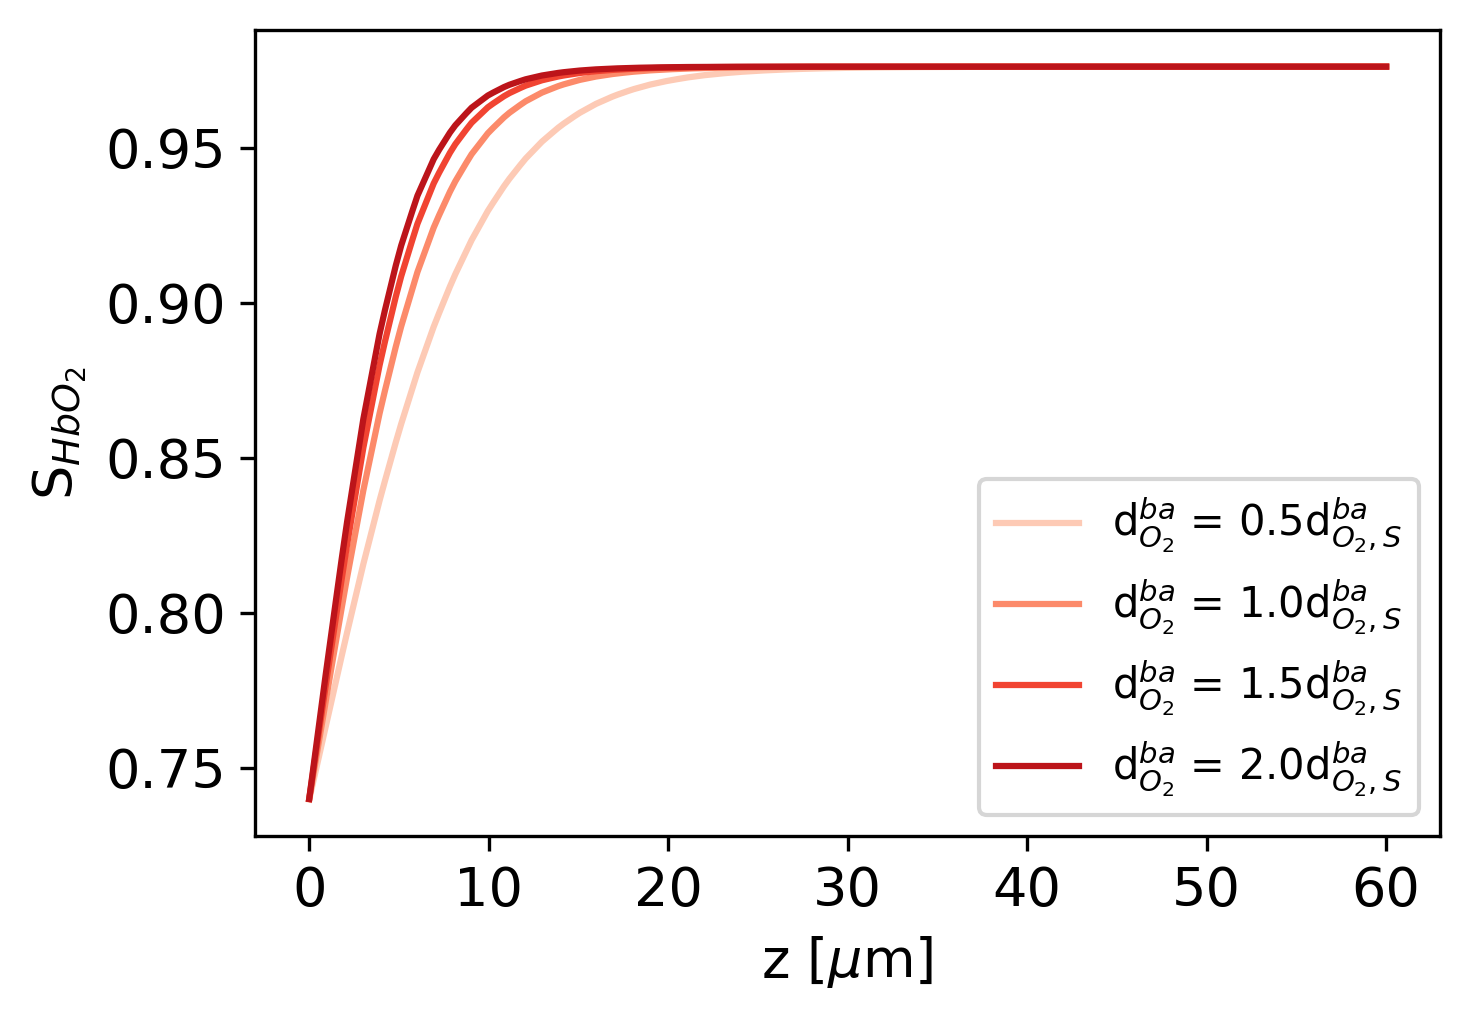

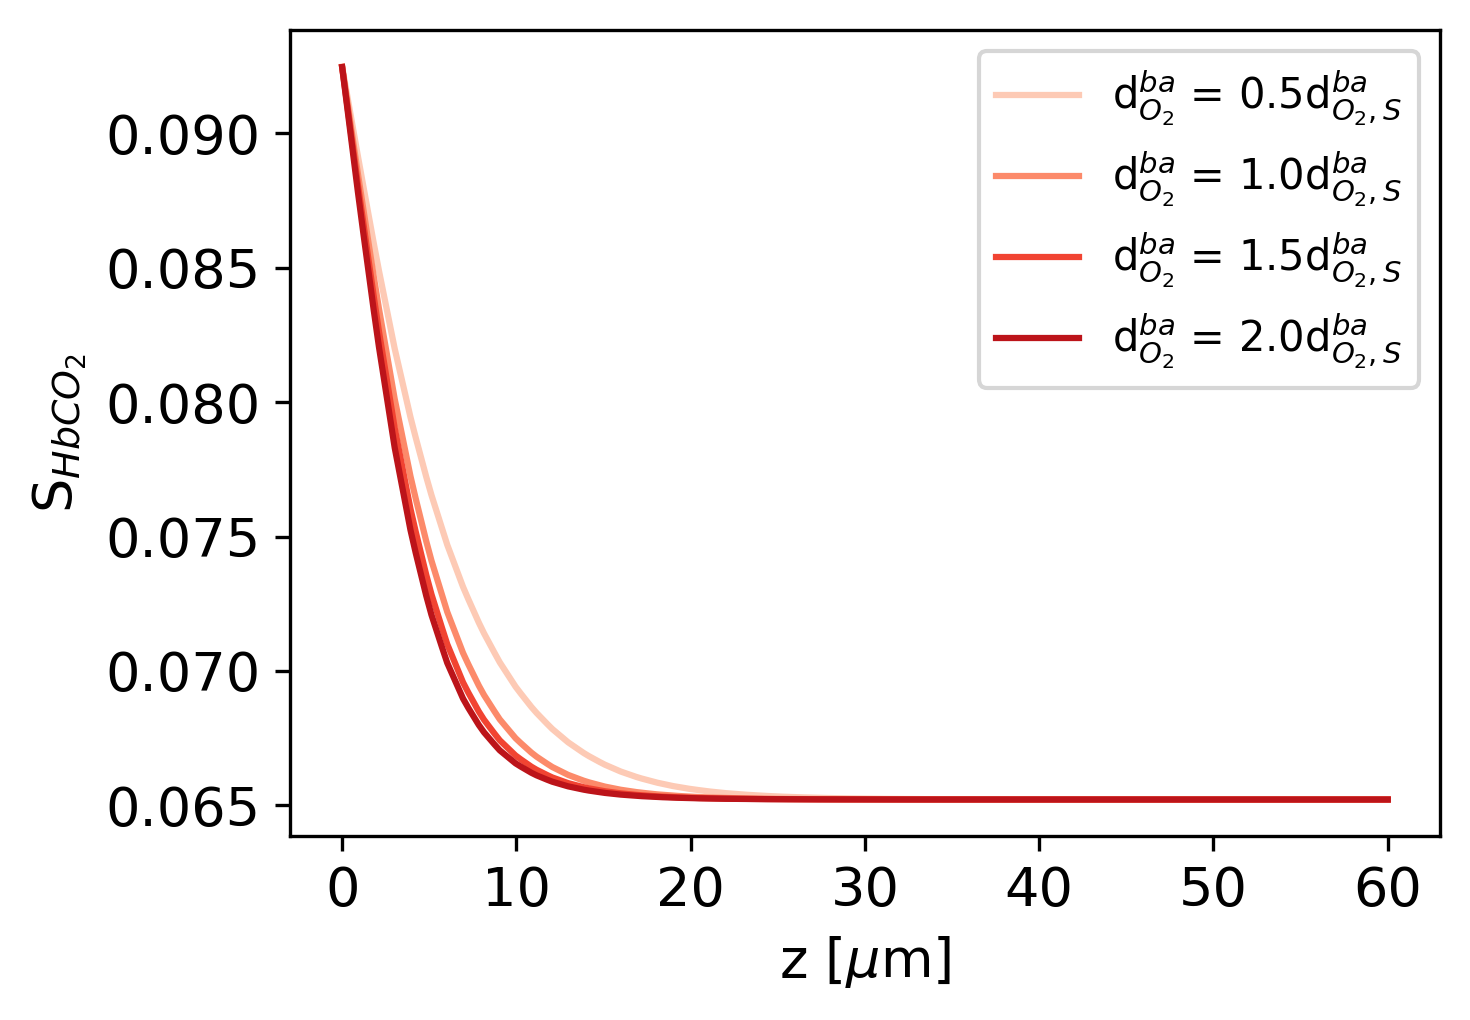

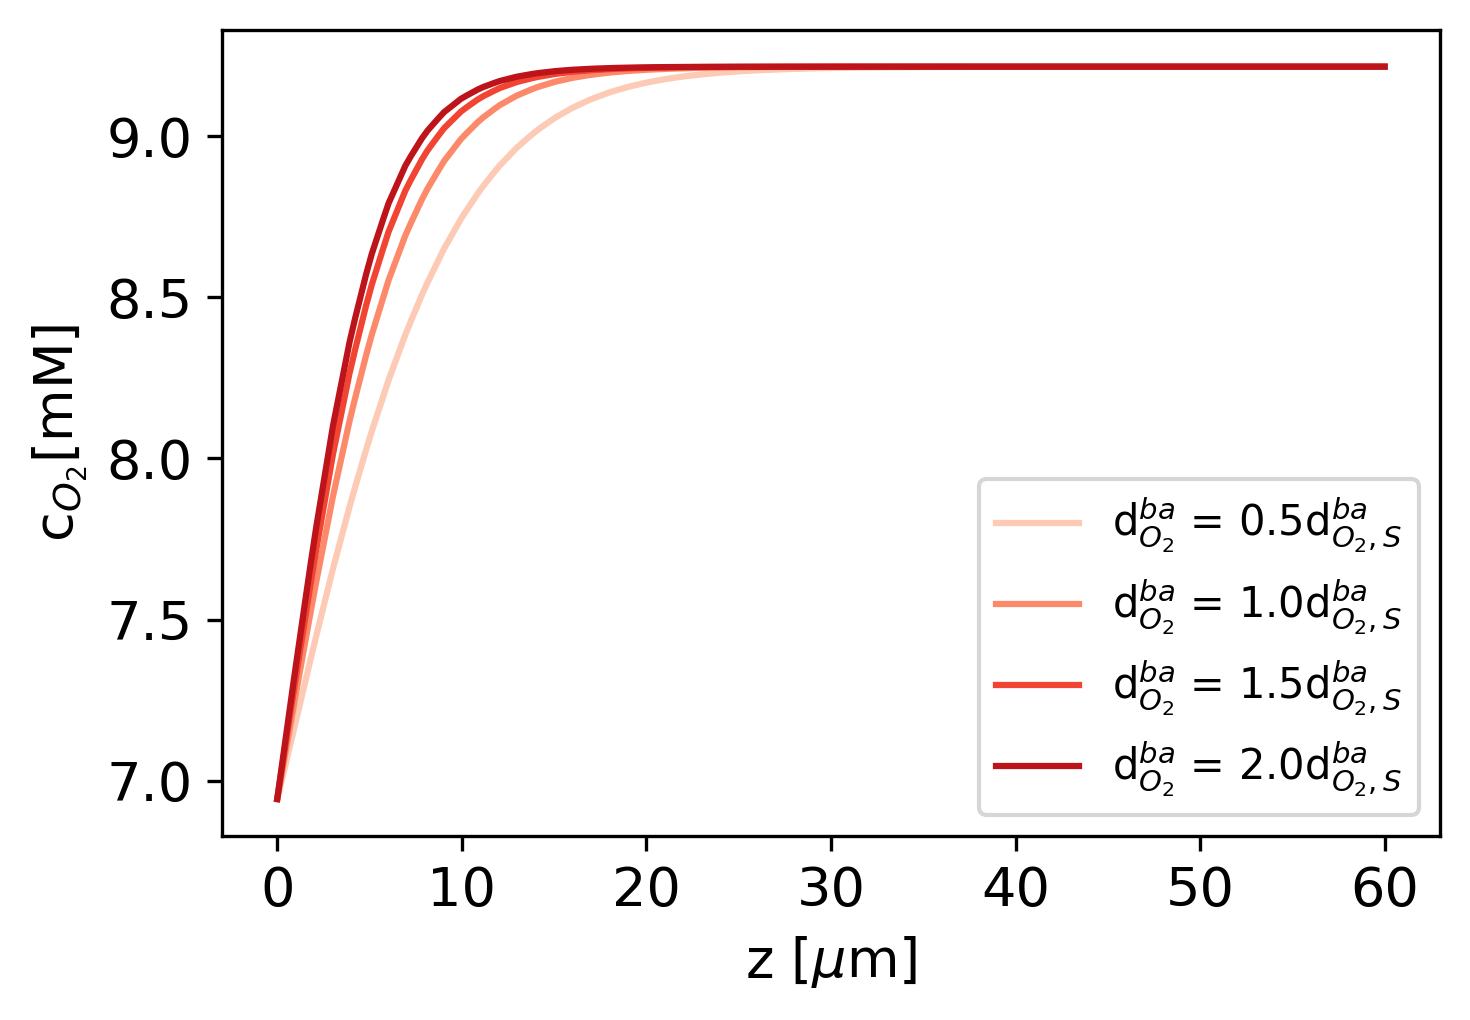

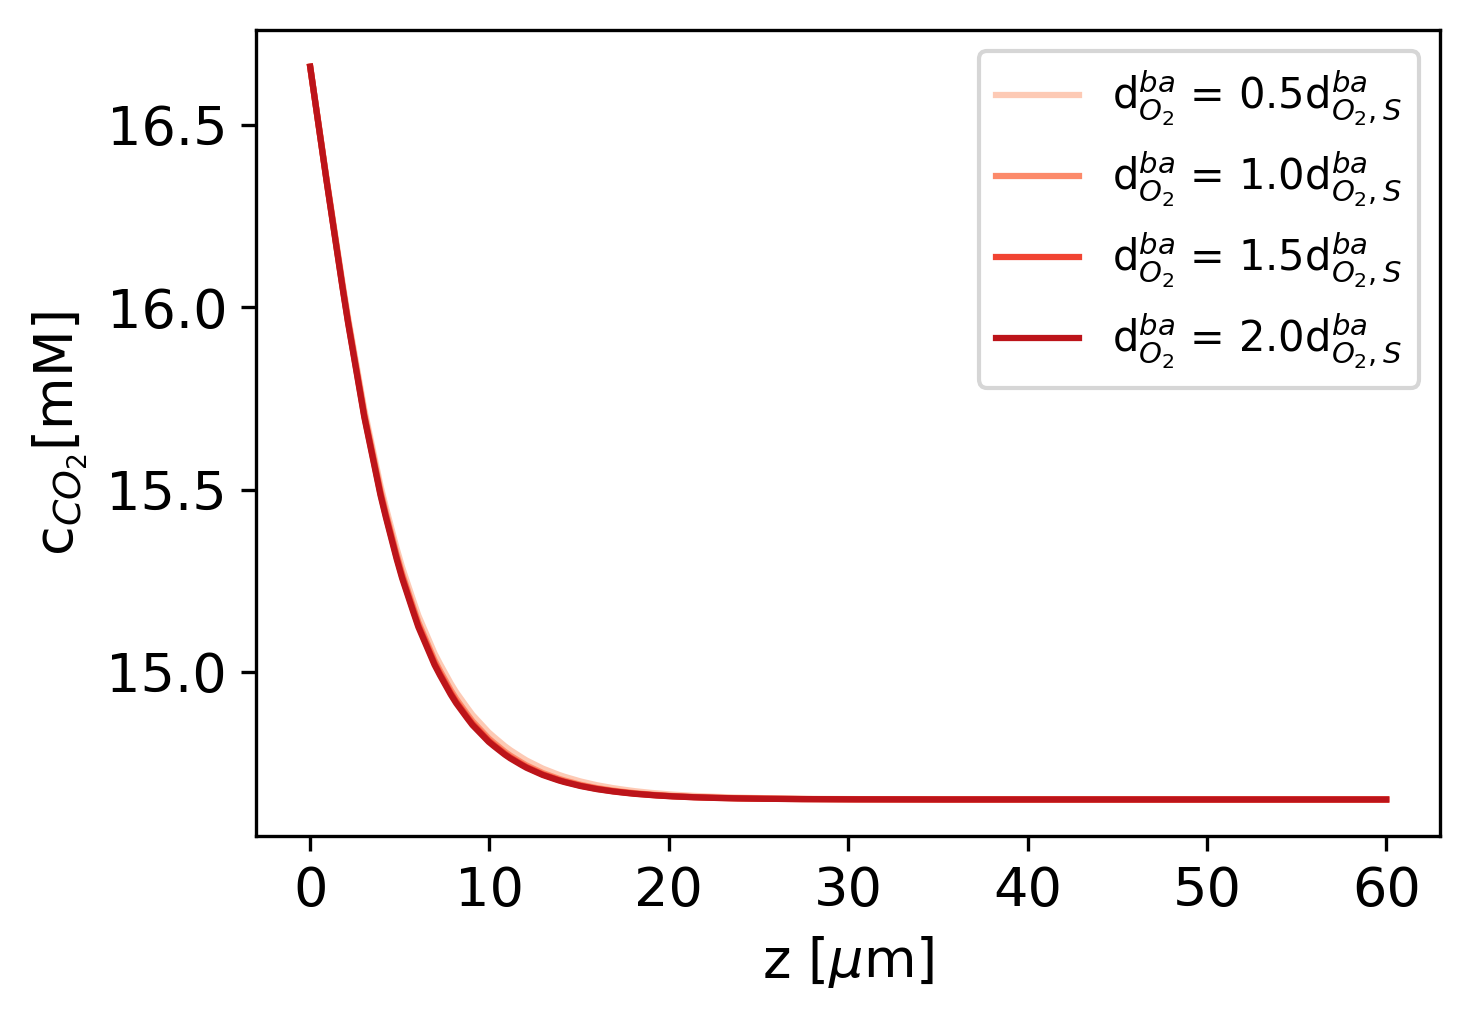

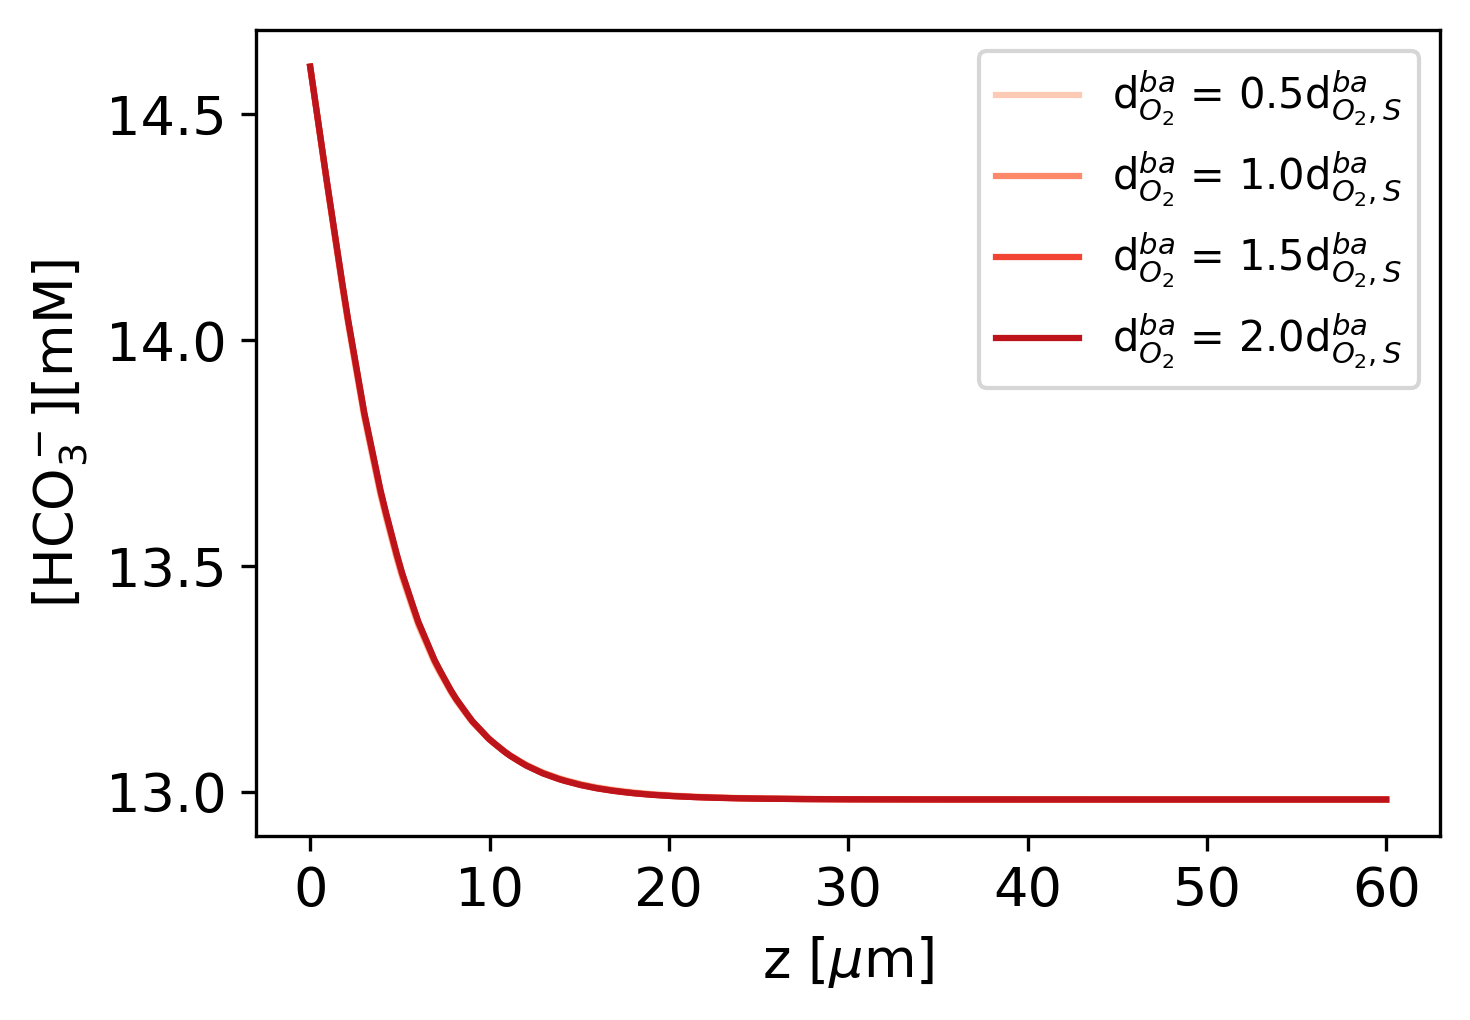

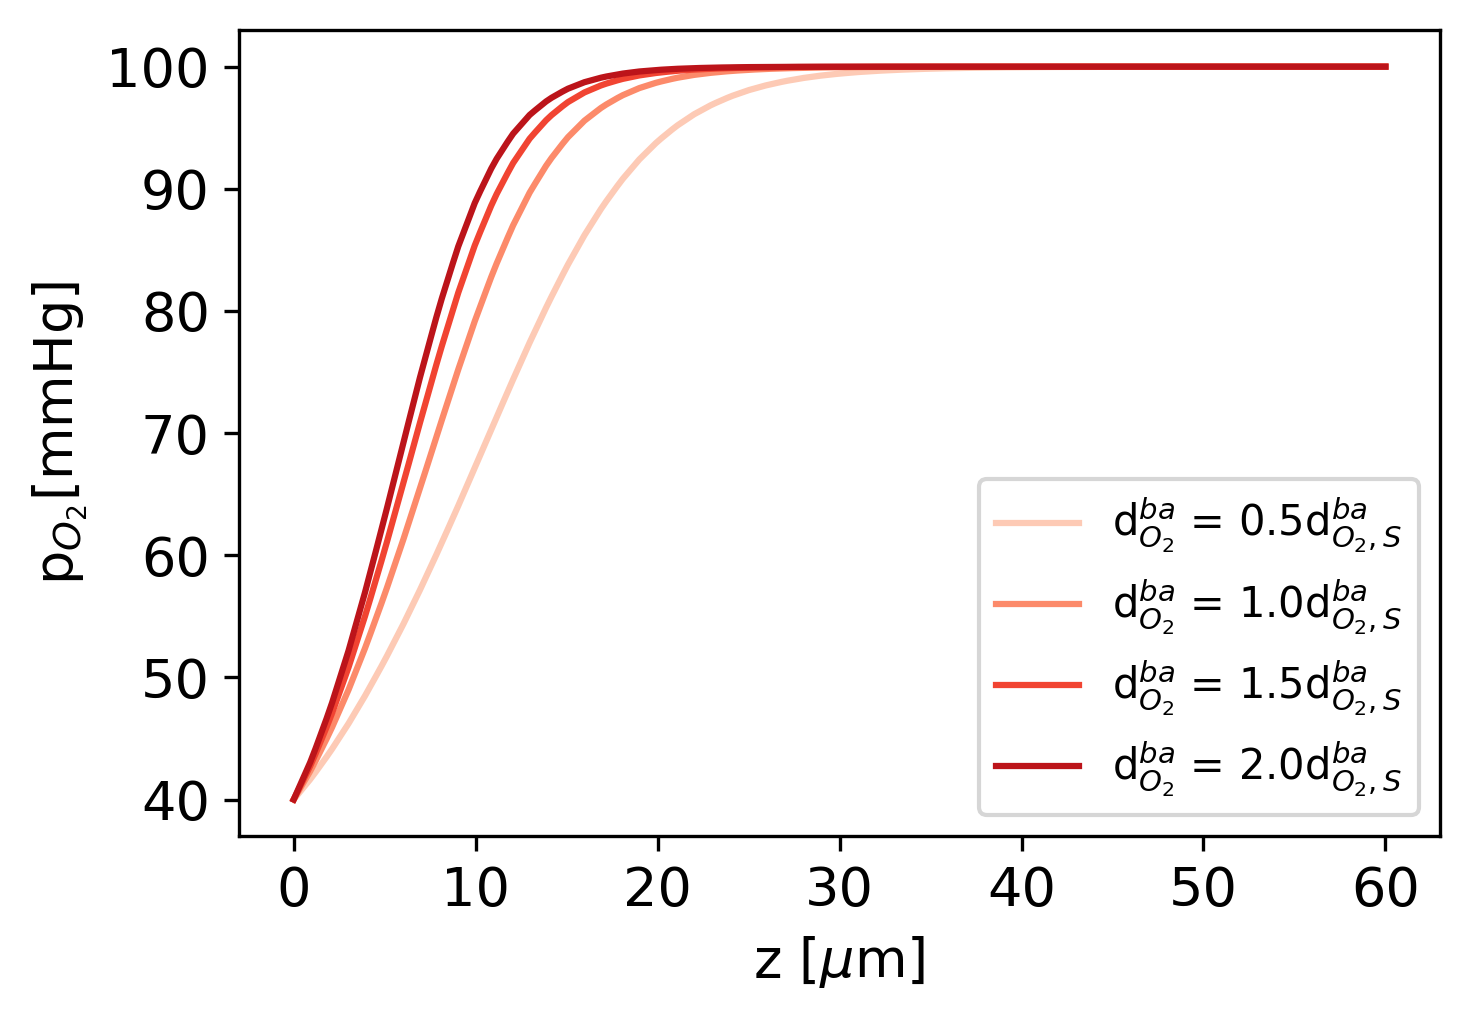

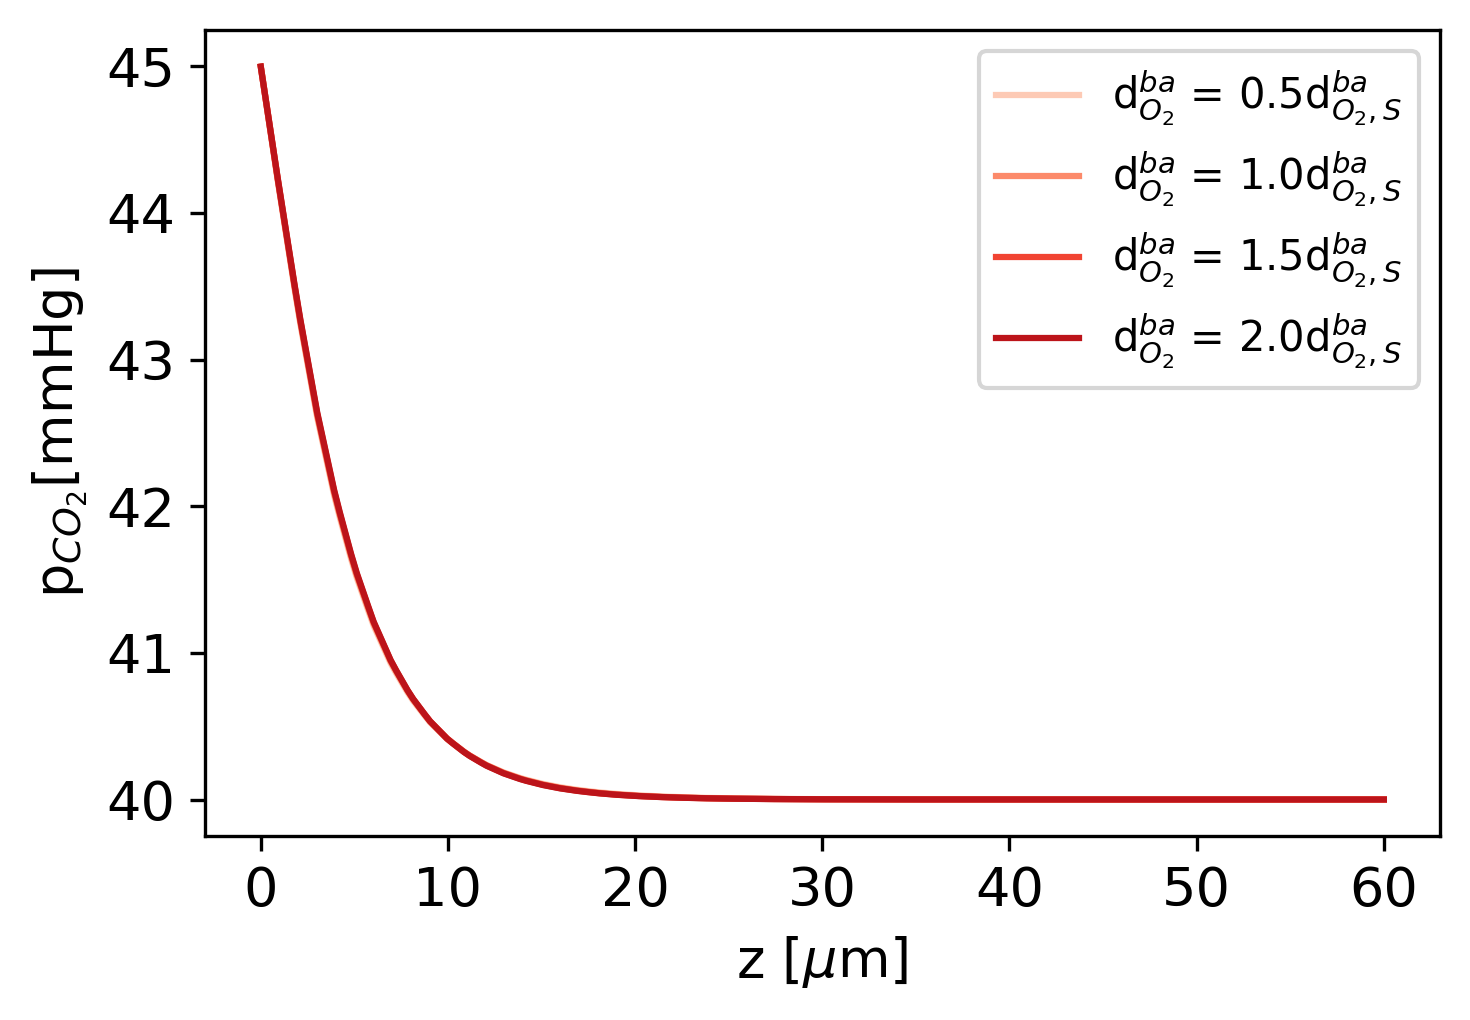

In [105]:
# diffusion-dependent fields

colors = sns.color_palette("Reds", len(difs_O2))

j = 0
for func_name in model.func_dict.keys():
    fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
    i = 0
    for dif_O2_curr in results_dif_O2.keys():
        ax.plot(model.z, func_factor[j]*results_dif_O2[dif_O2_curr][func_name]['4.0'], 
                color=colors[i], label=r'd$_{O_2}^{ba}$' + f' = {round(np.linspace(0.5, 2.0, 4)[i],2)}' + r'd$_{O_2, S}^{ba}$')
        i += 1
    ax.set_ylabel(func_names[j] + func_units[j], size=13)
    ax.set_xlabel(r"z [$\mu$m]", size=13)
    ax.tick_params(axis='both', labelsize=13)
    ax.legend()
    plt.tight_layout()
    plt.show()

    j += 1

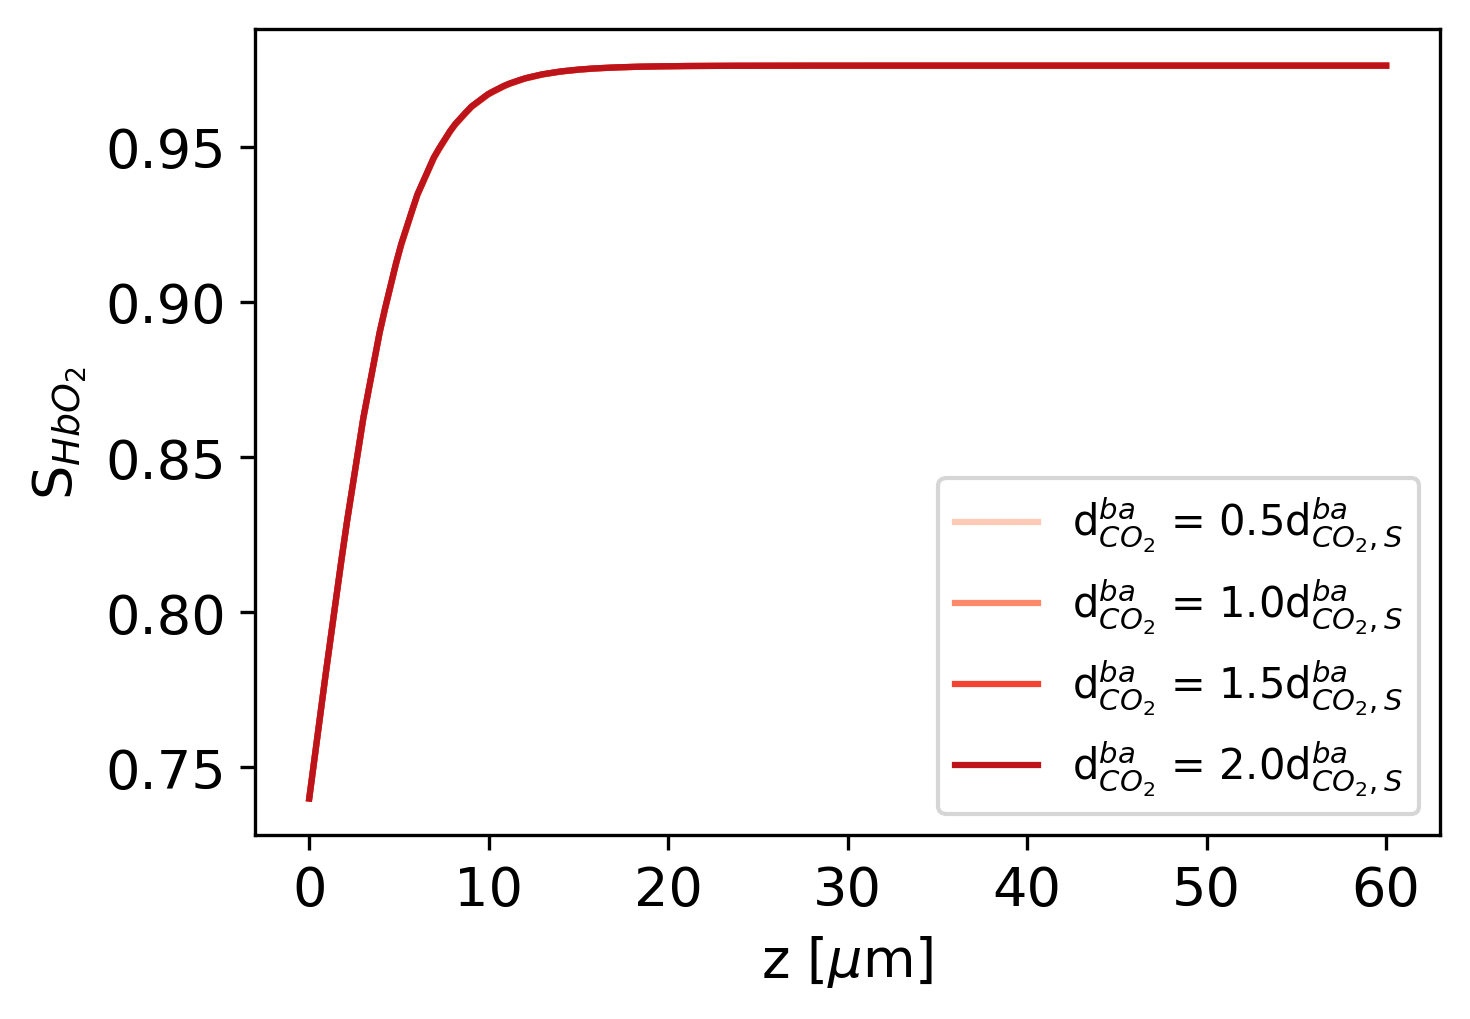

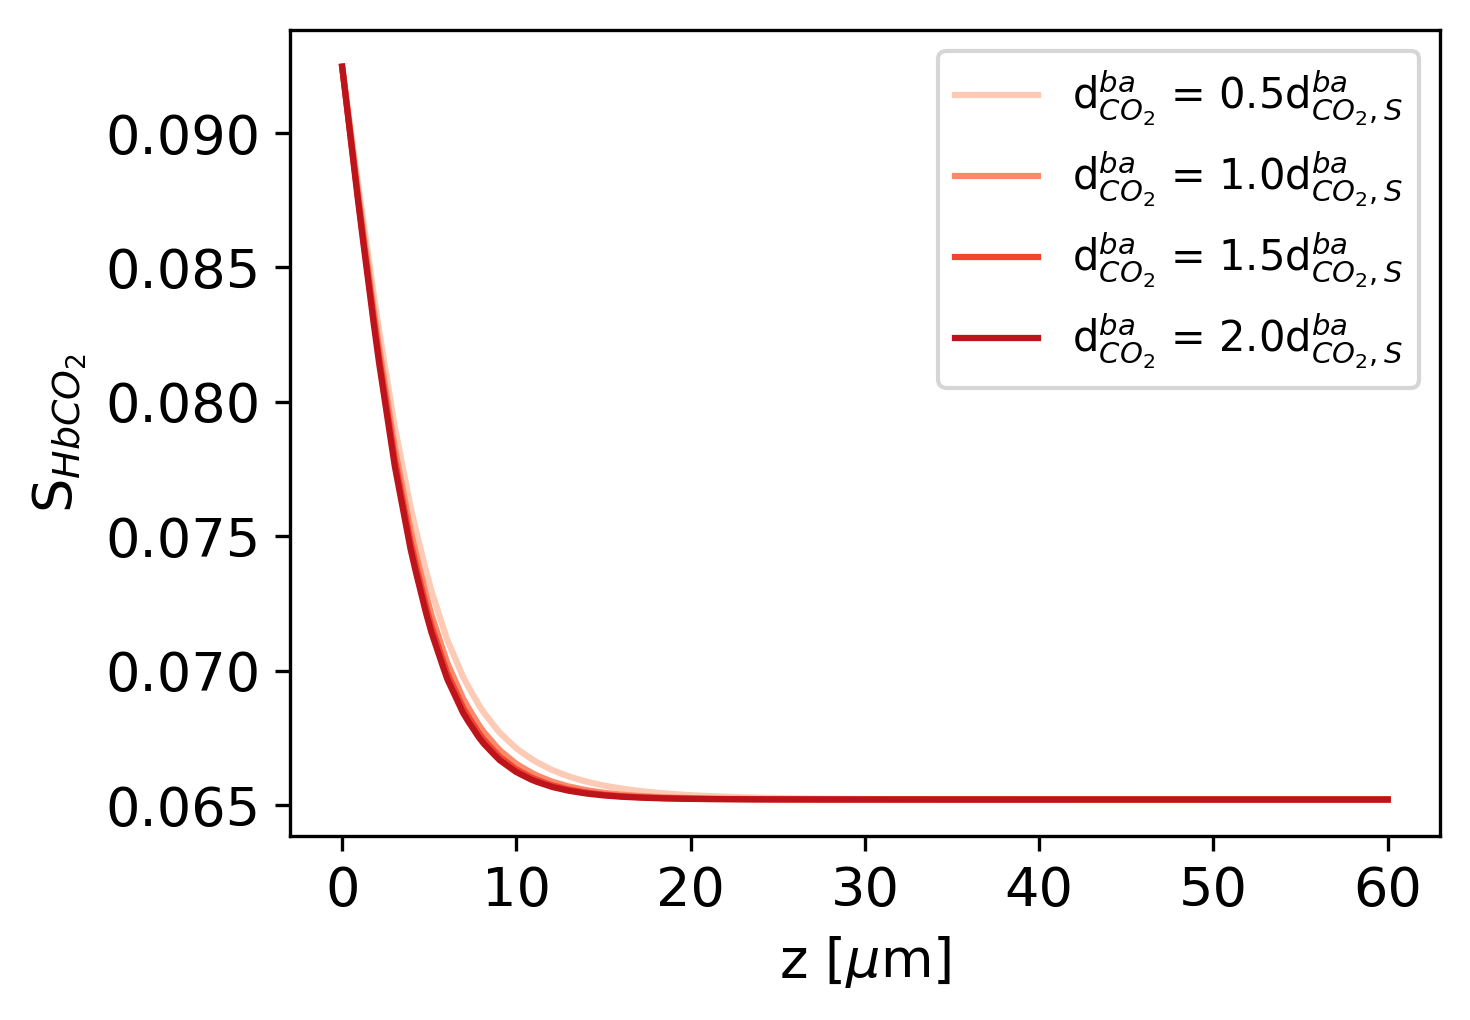

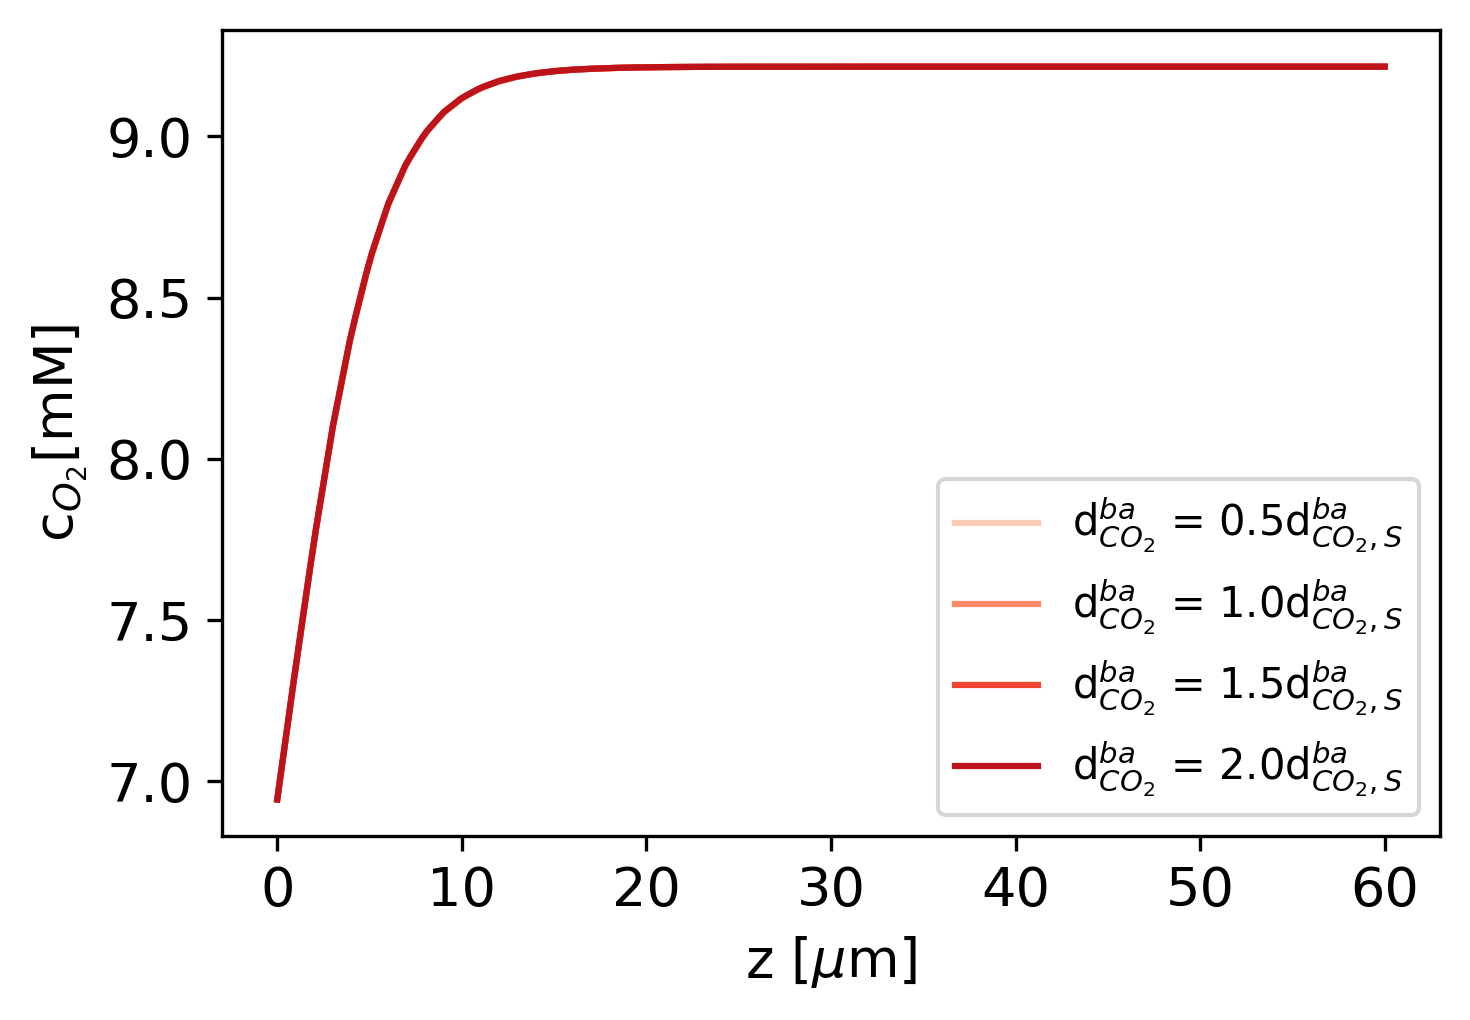

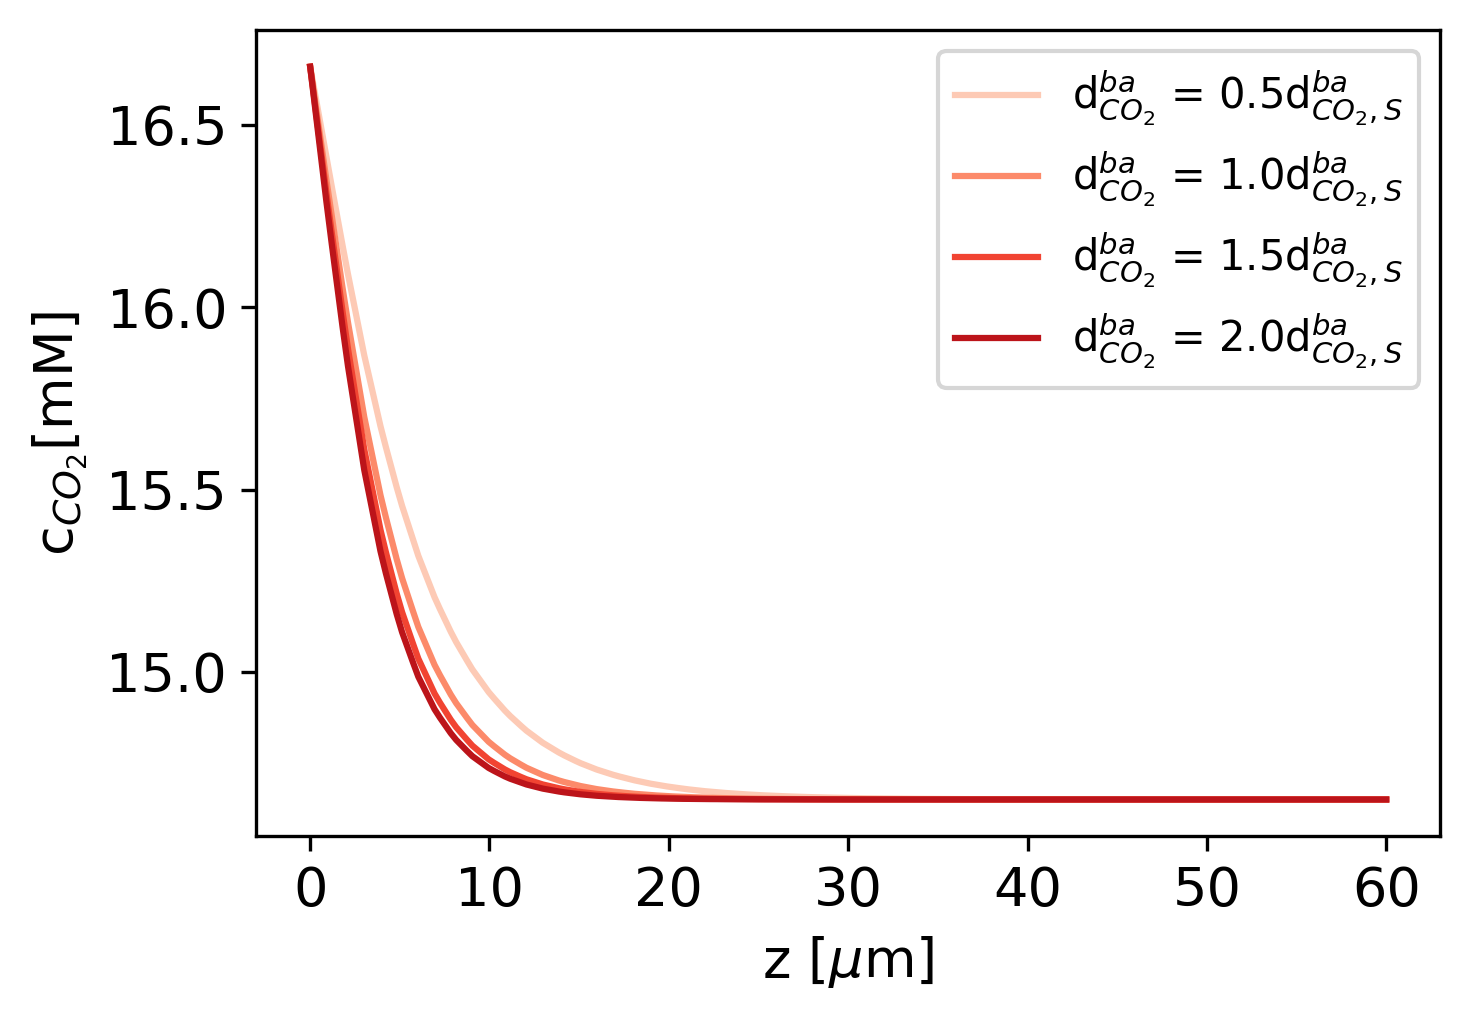

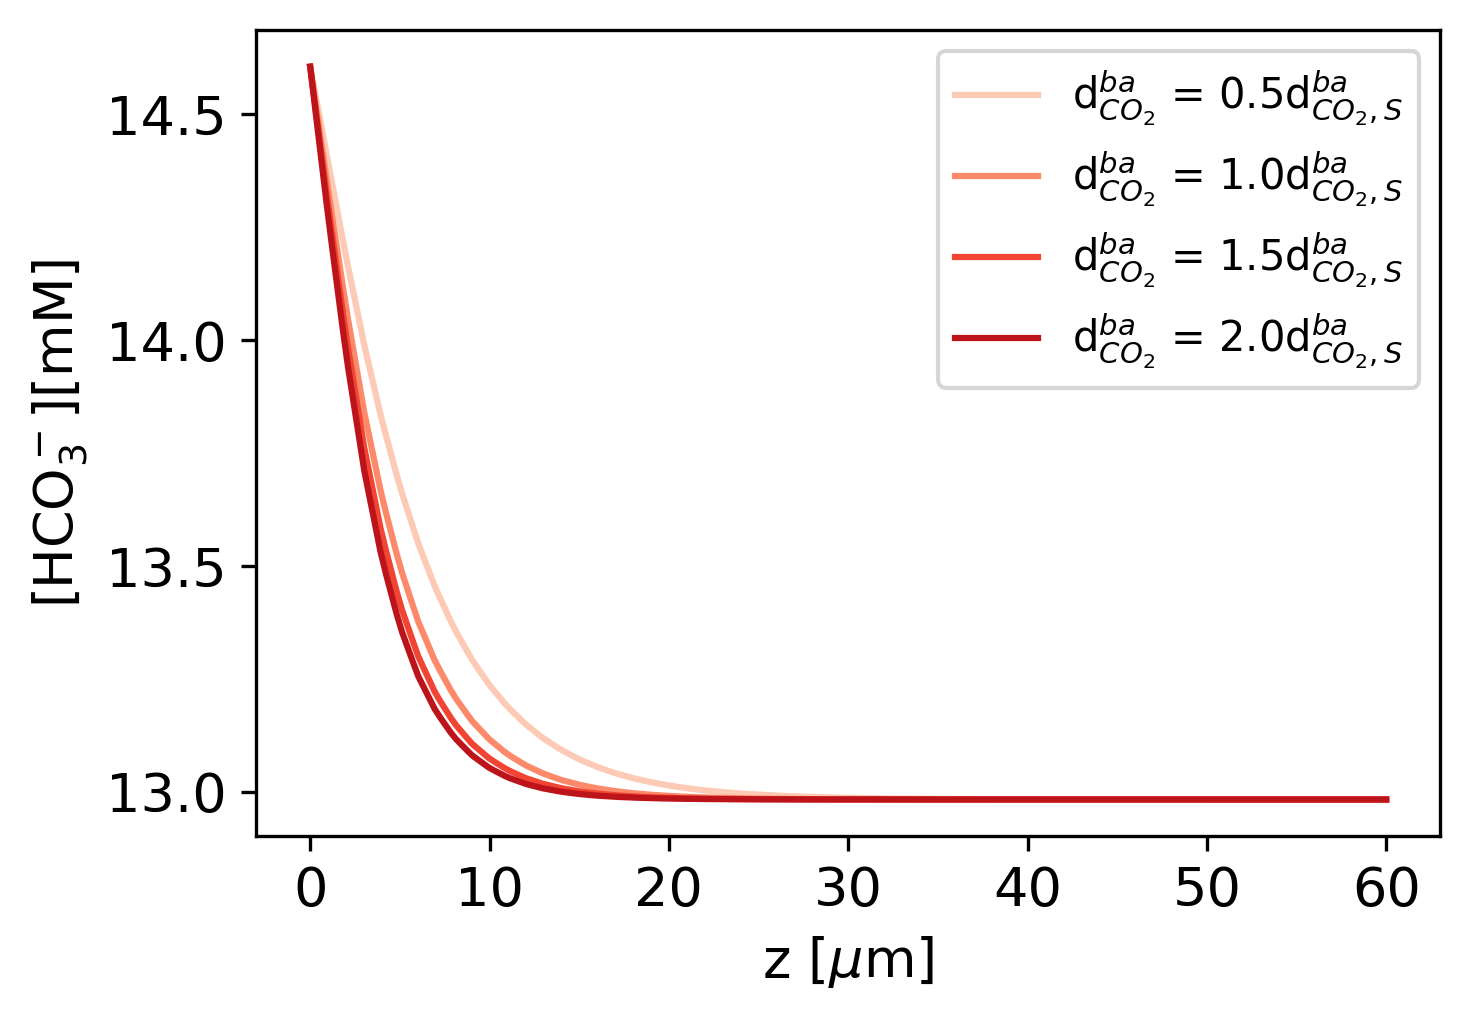

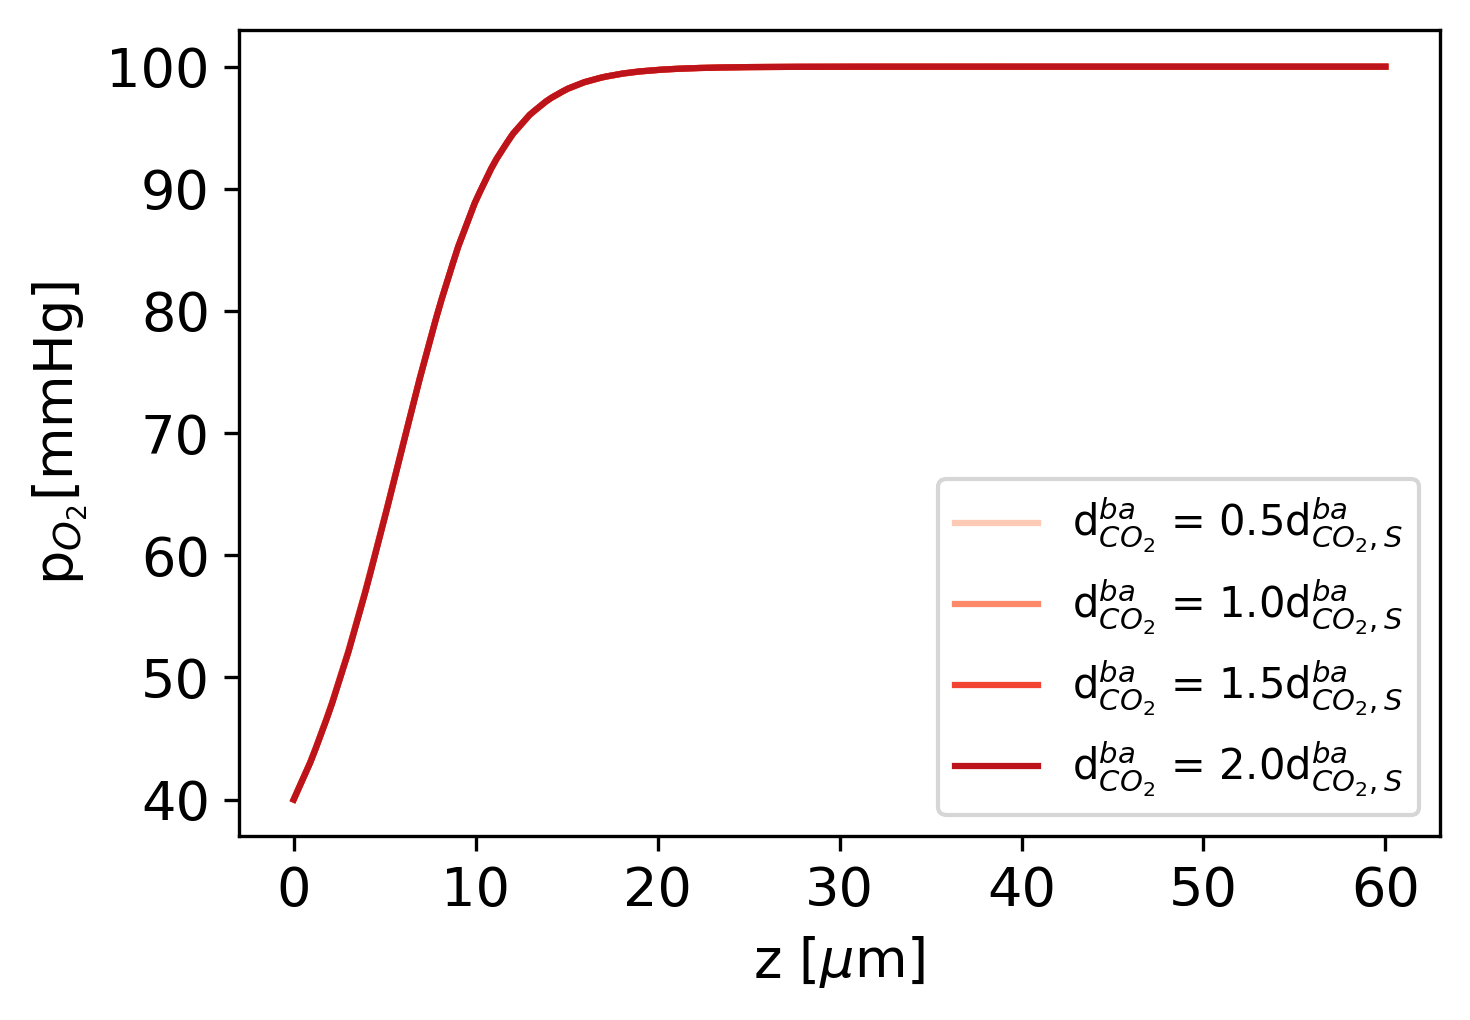

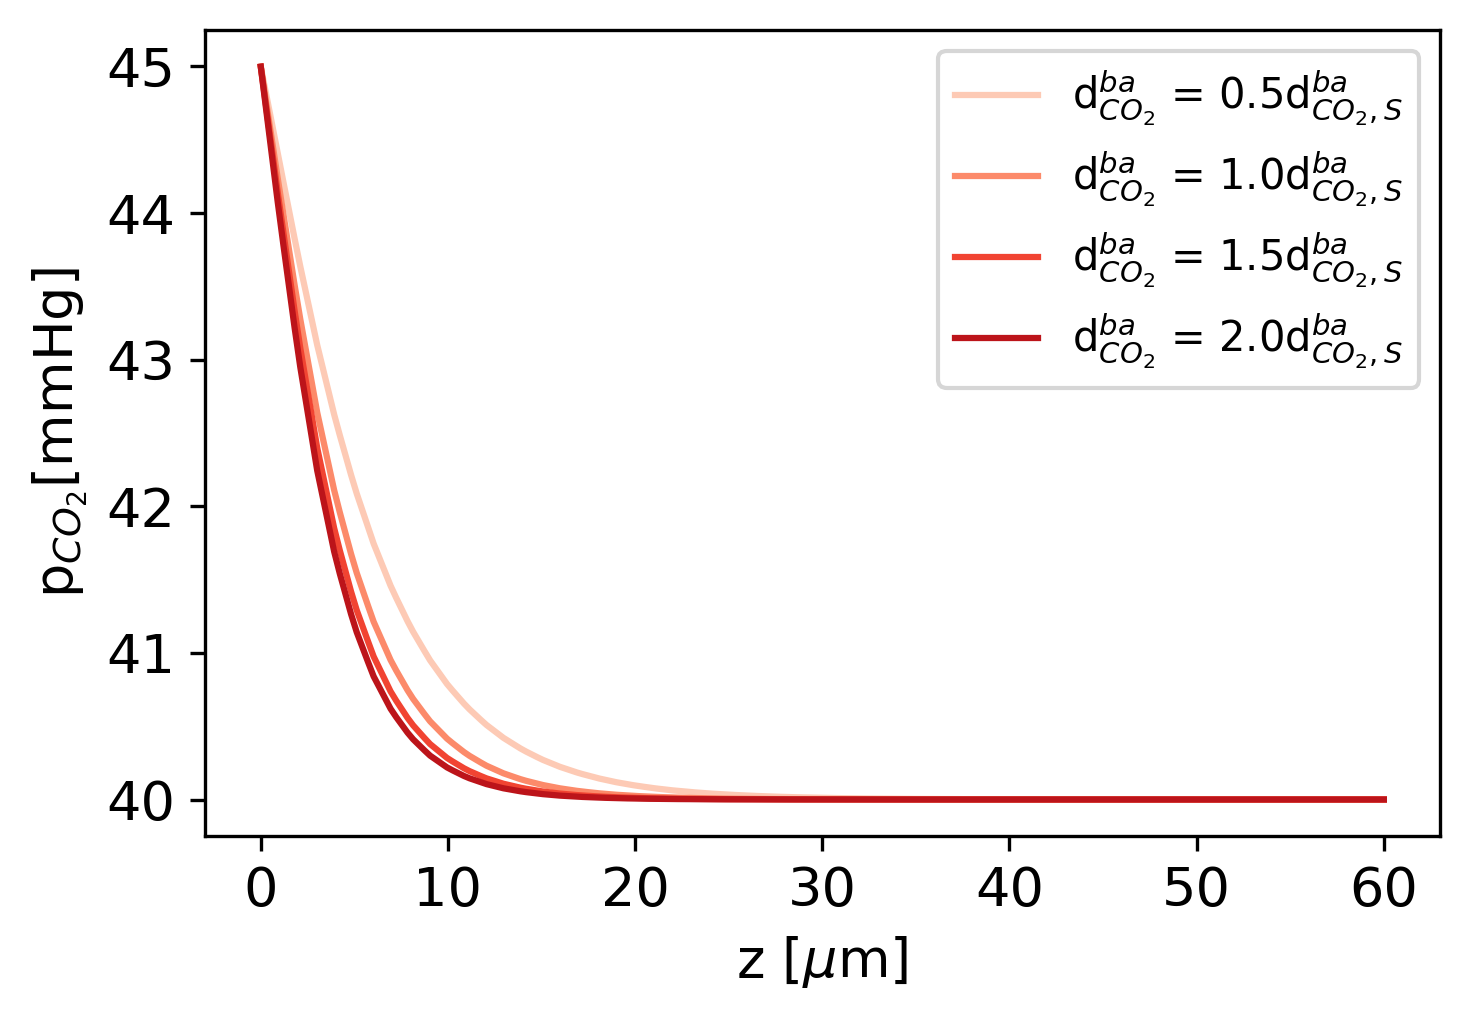

In [106]:
# diffusion-dependent fields

colors = sns.color_palette("Reds", len(difs_CO2))

j = 0
for func_name in model.func_dict.keys():
    fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
    i = 0
    for dif_CO2_curr in results_dif_CO2.keys():
        ax.plot(model.z, func_factor[j]*results_dif_CO2[dif_CO2_curr][func_name]['4.0'], 
                color=colors[i], label=r'd$_{CO_2}^{ba}$' + f' = {round(np.linspace(0.5, 2.0, 4)[i],2)}' + r'd$_{CO_2, S}^{ba}$')
        i += 1
    ax.set_ylabel(func_names[j] + func_units[j], size=13)
    ax.set_xlabel(r"z [$\mu$m]", size=13)
    ax.tick_params(axis='both', labelsize=13)
    ax.legend()
    plt.tight_layout()
    plt.show()

    j += 1